In [40]:
#Cargar librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [41]:
# importar datos, documento csv
df = pd.read_csv('Pop_Growth_Fertility_Mortality_Ind.csv', encoding='ISO-8859-1')
#indexar datos
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6751,722,SIDS,2022,Total fertility rate (children per women),2.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6752,722,SIDS,2022,"Infant mortality for both sexes (per 1,000 liv...",27.3,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6753,722,SIDS,2022,Life expectancy at birth for both sexes (years),72.5,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6754,722,SIDS,2022,Life expectancy at birth for males (years),69.6,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [42]:
# Se filtran las filas correspondientes a las series y al año 2020 de la Expectativa de vida
Vida = df[df['Series'] == 'Life expectancy at birth for both sexes (years)']
Vida = Vida[Vida['Year'] == 2020]
Vida = Vida[['Unnamed: 1','Value']]
Vida.rename({'Unnamed: 1':'Country', 'Value':'Life expectancy'}, axis=1, inplace=True)
Vida=Vida.set_index('Country')
Vida

,Life expectancy
Country,
"Total, all countries or areas",72
Africa,62.2
Northern Africa,71.2
Sub-Saharan Africa,60.3
Eastern Africa,63.7
...,...
Zambia,62.4
Zimbabwe,61.1
LLDCs,64.1


In [43]:
# Se filtran las filas correspondientes a las series y al año 2020 de Mortalidad
Mortalidad = df[df['Series'] == 'Infant mortality for both sexes (per 1,000 live births)']
Mortalidad = Mortalidad[Mortalidad['Year'] == 2020]
Mortalidad = Mortalidad[['Unnamed: 1','Value']]
Mortalidad.rename({'Unnamed: 1':'Country', 'Value':'Infant mortality'}, axis=1, inplace=True)
Mortalidad=Mortalidad.set_index('Country')
Mortalidad

,Infant mortality
Country,
"Total, all countries or areas",28.3
Africa,46.4
Northern Africa,22.6
Sub-Saharan Africa,50
Eastern Africa,38.3
...,...
Zambia,42.6
Zimbabwe,36.8
LLDCs,37.7


In [44]:
# Generar una base de datos con la información de la expectativa de vida y la mortalidad infantil
global_data = pd.concat([Vida, Mortalidad], join='outer', axis=1)
global_data = global_data[1:]
global_data = global_data.dropna()
global_data

,Life expectancy,Infant mortality
Country,,
Africa,62.2,46.4
Northern Africa,71.2,22.6
Sub-Saharan Africa,60.3,50
Eastern Africa,63.7,38.3
Middle Africa,59.7,54
...,...,...
Zambia,62.4,42.6
Zimbabwe,61.1,36.8
LLDCs,64.1,37.7


In [45]:
# Convertir los datos a formato numérico
global_data['Life expectancy'] = pd.to_numeric(global_data['Life expectancy'], downcast='float')
global_data['Infant mortality'] = pd.to_numeric(global_data['Infant mortality'], downcast='float')

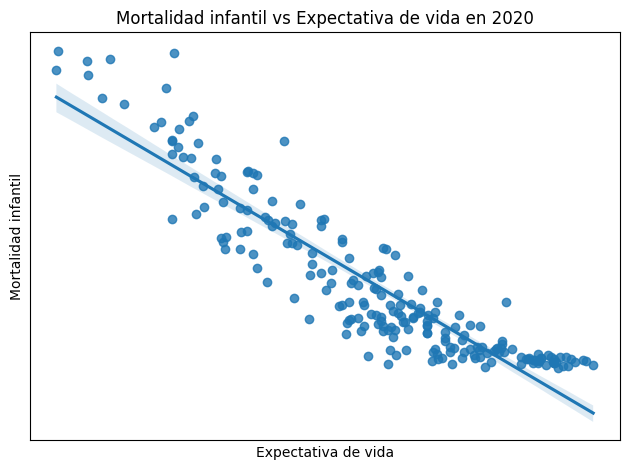

In [46]:
# Generar un gráfico de dispersión de la mortalidad infantil vs la expectativa de vida

fig, ax = plt.subplots()
sns.regplot(data=global_data, x='Life expectancy', y='Infant mortality')
plt.title('Mortalidad infantil vs Expectativa de vida en 2020')
plt.xlabel('Expectativa de vida')
plt.ylabel('Mortalidad infantil')
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.tight_layout()
plt.savefig('dispersion.jpg', dpi=300)
plt.show()

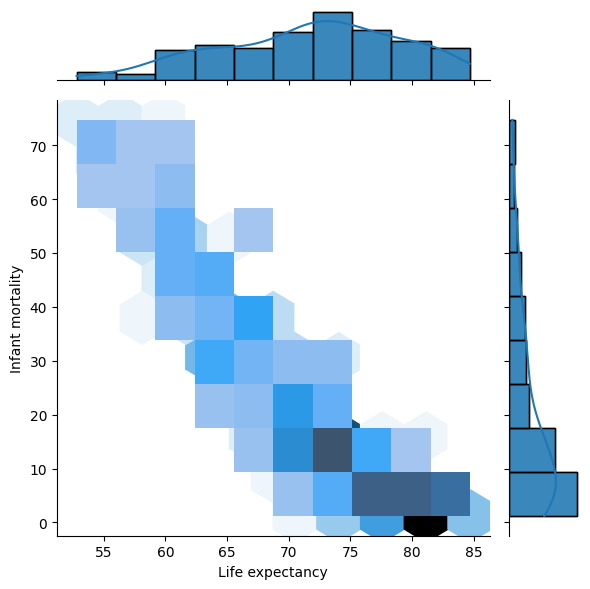

In [47]:
graf = sns.jointplot(data=global_data, x='Life expectancy', y='Infant mortality', kind='hex')
graf.plot(sns.histplot, sns.histplot, kde=True)
plt.tight_layout()
plt.savefig('grafica2.jpg', dpi=300)

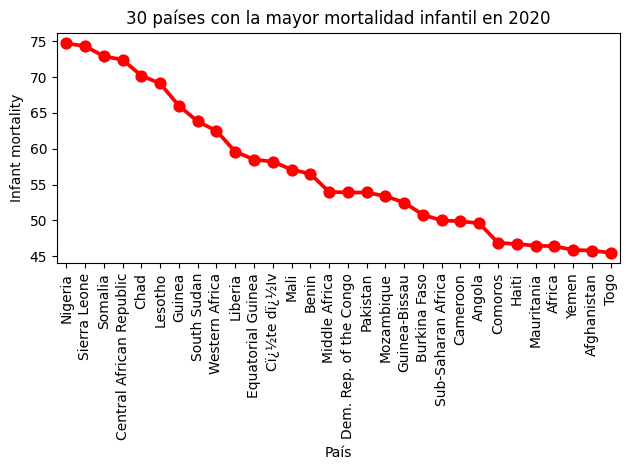

In [48]:
# Filtrar los 10 países con la mayor mortalidad infantil
highest_mortality = global_data.nlargest(30, 'Infant mortality')

# Crear un gráfico de barras de la mortalidad infantil
sns.pointplot(data=highest_mortality, x='Country', y='Infant mortality', color='red')
plt.title('30 países con la mayor mortalidad infantil en 2020')
plt.xlabel('País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Mayor_mortalidad_infantil.jpg', dpi=300)
plt.show()

C:\Users\benma\AppData\Local\Temp\ipykernel_2396\1805641310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=lowest_mortality, x='Country', y='Infant mortality', palette ='viridis')


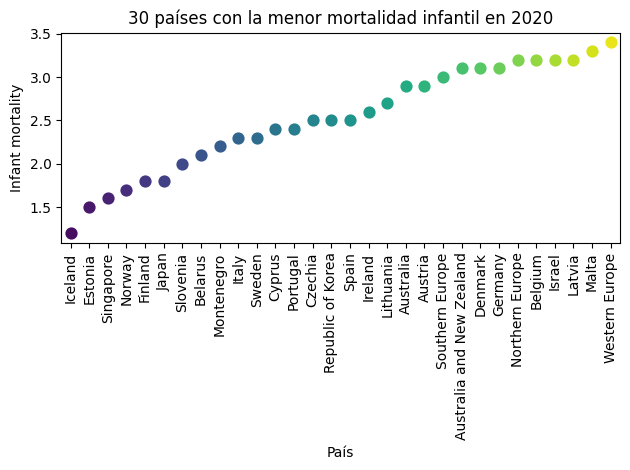

In [49]:
# Filtrar los 10 países con la menor mortalidad infantil
lowest_mortality = global_data.nsmallest(30, 'Infant mortality')

# Crear un gráfico de barras de la mortalidad infantil
sns.pointplot(data=lowest_mortality, x='Country', y='Infant mortality', palette ='viridis')
plt.title('30 países con la menor mortalidad infantil en 2020')
plt.xlabel('País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Menor_mortalidad_infantil.jpg', dpi=300)
plt.show()

In [50]:
# Encontrar la correlación entre la mortalidad infantil y la expectativa de vida
# Extraer tasa de crecimiento de la población anual

poblacion = df[df['Series'] == 'Population annual rate of increase (percent)']
poblacion = poblacion[poblacion['Year'] == 2020]
poblacion = poblacion[['Unnamed: 1','Value']]
poblacion.rename({'Unnamed: 1':'Country', 'Value':'Population increase'}, axis=1, inplace=True)
poblacion=poblacion.set_index('Country')
poblacion


,Population increase
Country,
"Total, all countries or areas",0.9
Africa,2.4
Northern Africa,1.8
Sub-Saharan Africa,2.6
Eastern Africa,2.6
...,...
Zambia,2.9
Zimbabwe,2.1
LLDCs,2.5


In [51]:
# Tasa global de fecundidad
fecundidad = df[df['Series'] == 'Total fertility rate (children per women)']
fecundidad = fecundidad[fecundidad['Year'] == 2020]
fecundidad = fecundidad[['Unnamed: 1','Value']]
fecundidad.rename({'Unnamed: 1':'Country', 'Value':'Fertility rate'}, axis=1, inplace=True)
fecundidad=fecundidad.set_index('Country')
fecundidad

,Fertility rate
Country,
"Total, all countries or areas",2.3
Africa,4.4
Northern Africa,3.1
Sub-Saharan Africa,4.7
Eastern Africa,4.3
...,...
Zambia,4.4
Zimbabwe,3.5
LLDCs,4


In [52]:
# Esperanza de vida al nacer para varones
Vida_h = df[df['Series'] == 'Life expectancy at birth for males (years)']
Vida_h = Vida_h[Vida_h['Year'] == 2020]
Vida_h = Vida_h[['Unnamed: 1','Value']]
Vida_h.rename({'Unnamed: 1':'Country', 'Value':'Life expectancy (males)'}, axis=1, inplace=True)
Vida_h=Vida_h.set_index('Country')
Vida_h

,Life expectancy (males)
Country,
"Total, all countries or areas",69.4
Africa,60.3
Northern Africa,69
Sub-Saharan Africa,58.4
Eastern Africa,61.2
...,...
Zambia,59.6
Zimbabwe,58.1
LLDCs,61.4


In [53]:
# Esperanza de vida al nacer para mujeres

Vida_m = df[df['Series'] == 'Life expectancy at birth for females (years)']
Vida_m = Vida_m[Vida_m['Year'] == 2020]
Vida_m = Vida_m[['Unnamed: 1','Value']]
Vida_m.rename({'Unnamed: 1':'Country', 'Value':'Life expectancy (females)'}, axis=1, inplace=True)
Vida_m=Vida_m.set_index('Country')
Vida_m

,Life expectancy (females)
Country,
"Total, all countries or areas",74.8
Africa,64.2
Northern Africa,73.6
Sub-Saharan Africa,62.2
Eastern Africa,66.3
...,...
Zambia,65
Zimbabwe,63.9
LLDCs,66.8


In [54]:
# Crear Dataframe Global_data con la información de la esperanza de vida, mortalidad infantil,
# tasa de crecimiento de la población, tasa de fecundidad, esperanza de vida para hombres y mujeres
# y se realiza una union de los datos de tipo 'outer' para que se incluyan todos los paises

global_data = pd.concat([Vida, Mortalidad, poblacion, fecundidad, Vida_h, Vida_m], join='outer', axis=1)
global_data = global_data[1:] 
# Eliminar filas con valores nulos
global_data = global_data.dropna() 
global_data

,Life expectancy,Infant mortality,Population increase,Fertility rate,Life expectancy (males),Life expectancy (females)
Country,,,,,,
Africa,62.2,46.4,2.4,4.4,60.3,64.2
Northern Africa,71.2,22.6,1.8,3.1,69,73.6
Sub-Saharan Africa,60.3,50,2.6,4.7,58.4,62.2
Eastern Africa,63.7,38.3,2.6,4.3,61.2,66.3
Middle Africa,59.7,54,3.1,5.7,57.7,61.7
...,...,...,...,...,...,...
Zambia,62.4,42.6,2.9,4.4,59.6,65
Zimbabwe,61.1,36.8,2.1,3.5,58.1,63.9
LLDCs,64.1,37.7,2.5,4,61.4,66.8


In [55]:
# Convertir los conjuntos de datos nuevos a formato numérico

global_data['Population increase'] = pd.to_numeric(global_data['Population increase'], downcast='float') 
global_data['Fertility rate'] = pd.to_numeric(global_data['Fertility rate'], downcast='float')
global_data['Life expectancy (males)'] = pd.to_numeric(global_data['Life expectancy (males)'], downcast='float')
global_data['Life expectancy (females)'] = pd.to_numeric(global_data['Life expectancy (females)'], downcast='float')



In [56]:
# Realizar la correlación entre las variables
correlation = global_data.corr()
correlation

,Life expectancy,Infant mortality,Population increase,Fertility rate,Life expectancy (males),Life expectancy (females)
Life expectancy,1.000000,-0.915268,-0.639729,-0.844138,0.991792,0.992530
Infant mortality,-0.915268,1.000000,0.681825,0.855781,-0.881275,-0.934610
Population increase,-0.639729,0.681825,1.000000,0.762612,-0.610315,-0.663781
Fertility rate,-0.844138,0.855781,0.762612,1.000000,-0.805313,-0.868746
Life expectancy (males),0.991792,-0.881275,-0.610315,-0.805313,1.000000,0.969268
Life expectancy (females),0.992530,-0.934610,-0.663781,-0.868746,0.969268,1.000000


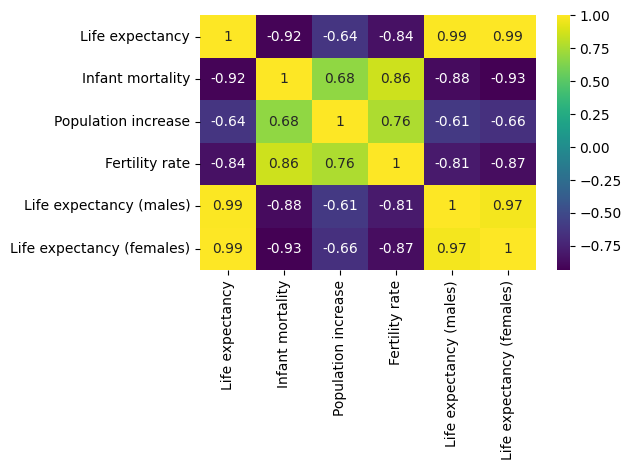

In [57]:
# Graficar la correlación
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('correlacion.jpg', dpi=400)